**Problem Statement**

We want analyze customer purchase behaviour (specifically, purchase amount) against various categories such as product types, age, gender, city, marital status etc. We have a dataset that represents purchase summary of various customers for selected high volume products from last month. More specifically, we have customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month. 

The goal is very simple: to get as many insights from the available data as possible. 

# 1. Loading Libraries and Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Sales_Data.csv')

In [3]:
data.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
144262,1004253,P00111942,M,46-50,11,B,0,0,8,17.0,NaN,9997
64482,1003884,P0096442,M,18-25,4,A,1,1,4,5.0,12.0,1383
182408,1004126,P00057642,M,26-35,17,B,1,0,1,15.0,16.0,19248
261330,1004248,P00346142,M,26-35,4,C,1,0,1,15.0,NaN,19125
181284,1003992,P00002142,M,26-35,4,B,1,0,1,5.0,8.0,7836


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
# User_ID	User ID
# Product_ID	Product ID
# Gender	Sex of User
# Age	Age in bins
# Occupation	Occupation (Masked)
# City_Category	Category of the City (A,B,C)
# Stay_In_Current_City_Years	Number of years stay in current city
# Marital_Status	Marital Status
# Product_Category_1	Product Category (Masked)
# Product_Category_2	Product may belongs to other category also (Masked)
# Product_Category_3	Product may belongs to other category also (Masked)
# Purchase	Purchase Amount (Target Variable)

# 2. Exploratory Data Analysis

In [4]:
data.shape # data currently has 12 columns

(537577, 12)

In [5]:
data.nunique() 

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
data['Occupation'].unique() # Occupation has 21 categories from 0 to 20

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [8]:
data['Stay_In_Current_City_Years'].unique() # Stay_In_Current_City_Years has five Categories : 0, 1, 2, 3, 4+

array(['2', '4+', '3', '1', '0'], dtype=object)

In [9]:
data['Age'].unique() # Age is divided into seven groups 

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
data['Marital_Status'].unique() # 0 for Unmarried and 1 for Married

array([0, 1], dtype=int64)

# Checking for null-values

In [11]:
data.isna().sum() # Product_Category_2 and Product_Category_3 seem to have too many missing entries, so we will just disregard them


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [12]:
del data['Product_Category_2']
del data['Product_Category_3']

In [13]:
data.shape # now, data has only 10 columns

(537577, 10)

In [14]:
data.isnull().sum() # data now has no missing entries

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

# Simple Gender Analysis Queries:

1. How many of the customers are 'M' or 'F'?
2. What is the ratio of 'M' to 'F' customers?
3. What is the distribution of Purchases made by Male Customers to that of Female Customers?

In [15]:
Gender_Distribution = data.groupby('Gender').size() # the gender distribution of customers

In [16]:
Gender_Distribution

Gender
F    132197
M    405380
dtype: int64

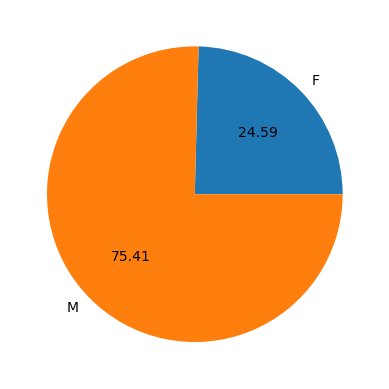

In [17]:
Gender_Distribution.plot(kind = 'pie', autopct = '%0.2f') # A pie-plot to show the percentage distribution
plt.show()

About 2/3rd of the customer base seems to be Male and the rest Female as shown in pie-plot above and bar-plot below

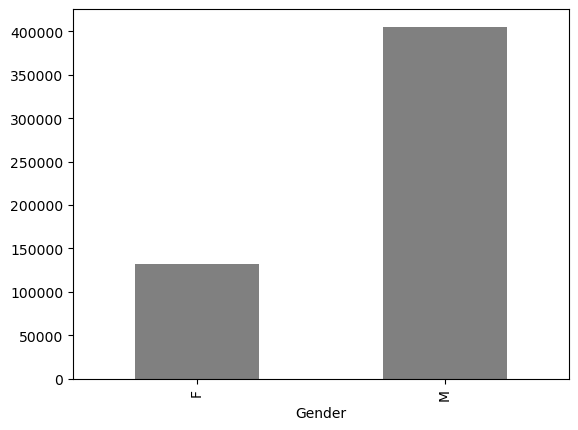

In [18]:
Gender_Distribution.plot(kind = 'bar', color = 'grey') # a bar graph to show the actual numbers of 'F' and 'M' customers
plt.show()

In [19]:
Purchase_by_Gender = data.groupby('Gender')['Purchase'].sum()

# Distribution of Purchase by Gender demonstrated by a pie-plot

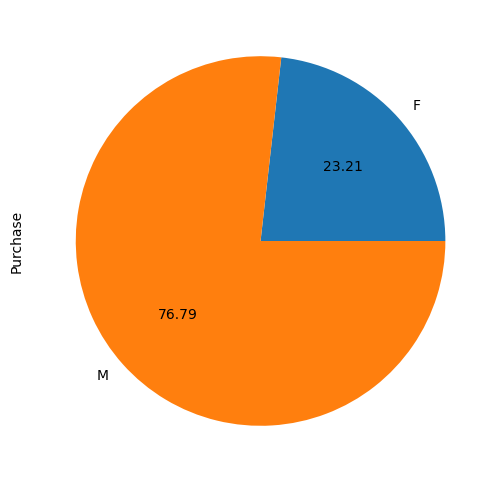

In [21]:
Purchase_by_Gender.plot(kind = 'pie', figsize = (6, 6), autopct = '%0.2f')
plt.show()

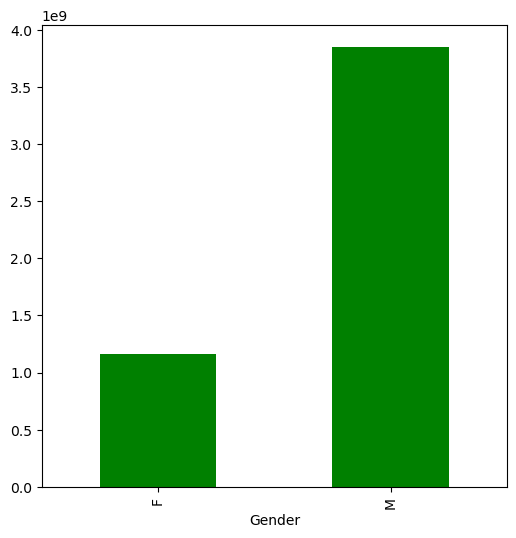

In [22]:
Purchase_by_Gender.plot(kind = 'bar', color = 'green', figsize = (6,6)) # a bar-plot to show the absolute amounts of Purchases
plt.show()

~76% of total purchases are made by Males, who are ~75% of customer base anyway. Therefore, it may be useful to also look at mean purchase amount by both the categories

In [23]:
# What is the mean Purchase_amount by 'F' and 'M'?

In [24]:
data.groupby('Gender')['Purchase'].mean() # appears that an average 'M' has made about 700 dollar of more purchase on average

Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64

The mean purchase is $500 more for Males than Females as calculated above and show below. 

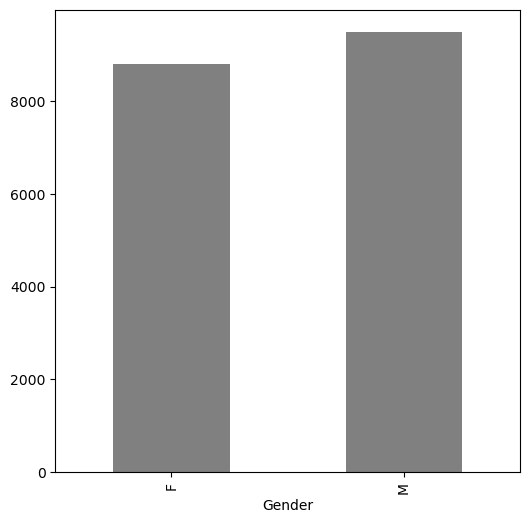

In [25]:
data.groupby('Gender')['Purchase'].mean().plot(kind = 'bar', color = 'gray', figsize = (6, 6)) # same information in bar-plot
plt.show()

# Simple Age Analysis Queries:

1. How many of the customers are in each age group? Show their distribution. 
3. What is the distribution of Purchases made by customers from different age-groups?

# Age distribution of customers

In [26]:
age_distribution = data.groupby('Age').size() # calculating the number of customers in each age-group

In [27]:
age_distribution

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

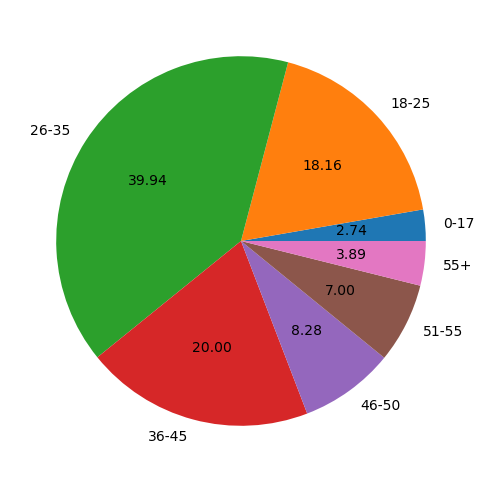

In [28]:
age_distribution.plot(kind = 'pie', figsize = (6,6), autopct = '%0.2f') # Relative distribution through a pie-plot
plt.show()

Following is a barplot to show the distribution of age_group of customers. Clearly, 26-35 age group has the largest customer. 

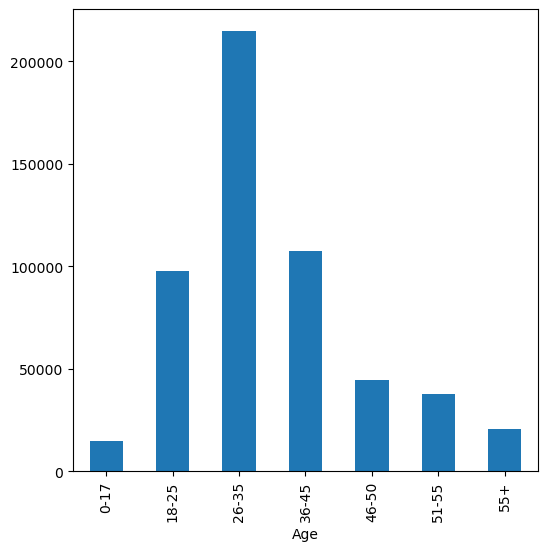

In [29]:
age_distribution.plot(kind = 'bar', figsize = (6,6))
plt.show()

# Now for the distribution of purchases by each age-group

In [31]:
purchase_by_age_group = data.groupby('Age')['Purchase'].sum()

In [32]:
purchase_by_age_group

Age
0-17      132659006
18-25     901669280
26-35    1999749106
36-45    1010649565
46-50     413418223
51-55     361908356
55+       197614842
Name: Purchase, dtype: int64

A visual of total purchase made by different groups

<Axes: xlabel='Age'>

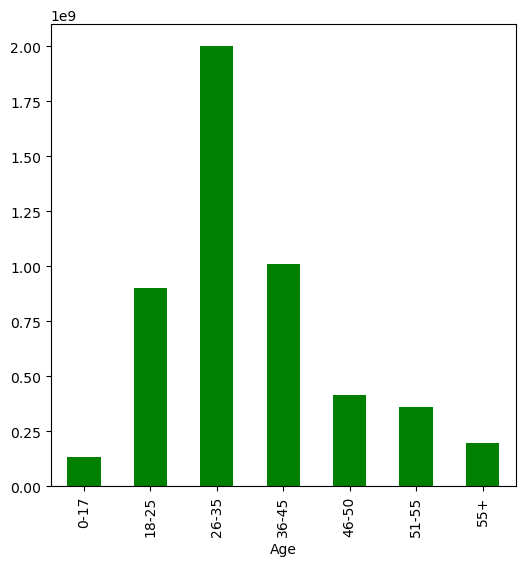

In [33]:
purchase_by_age_group.plot(kind = 'bar', figsize = (6, 6), color = 'green') # 26-35 and 36-45 have made the most purchase

The top total purchases are mostly affected by the group population.

<Axes: ylabel='Purchase'>

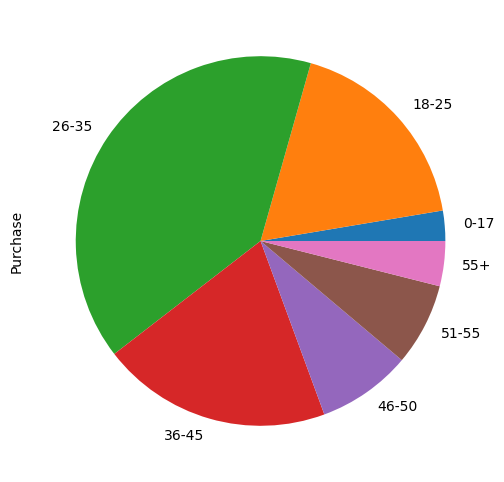

In [34]:
purchase_by_age_group.plot(kind = 'pie', figsize = (6, 6)) # same information on a pie-plot

However, the total purchase may be affected by the size of the group, therefore, we explore what is the mean purchase for each group. It is seen below that there is not much difference in average-purchase by different groups

In [35]:
mean_purchase_by_age = data.groupby('Age')['Purchase'].mean()

In [36]:
mean_purchase_by_age

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

The mean purchases are more evenly distributed than total purchase and also gives insights into what customer bases are more likely to spend money in comparison to others. 

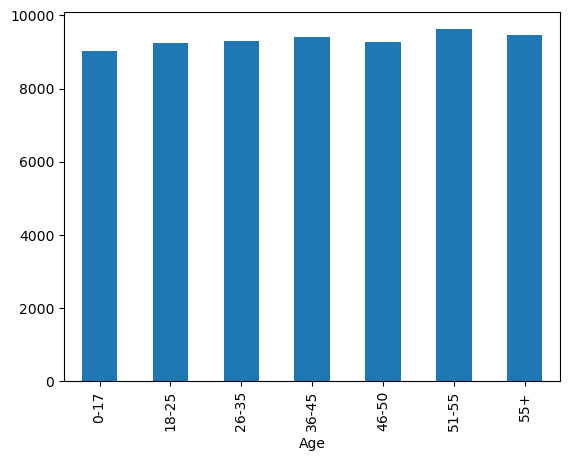

In [37]:
mean_purchase_by_age.plot(kind = 'bar')
plt.show()

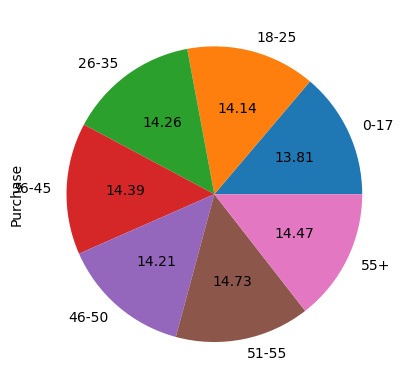

In [38]:
mean_purchase_by_age.plot(kind = 'pie', autopct = '%.2f')
plt.show()

We will do the same analysis with respect to Marital_Status

In [39]:
Marital_Status_Dist = data.groupby('Marital_Status').size()

In [40]:
Marital_Status_Dist

Marital_Status
0    317817
1    219760
dtype: int64

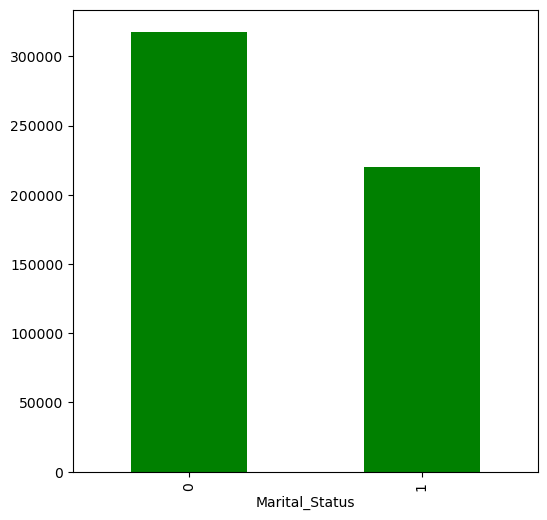

In [41]:
Marital_Status_Dist.plot(kind = 'bar', figsize = (6, 6), color = 'green')
plt.show()

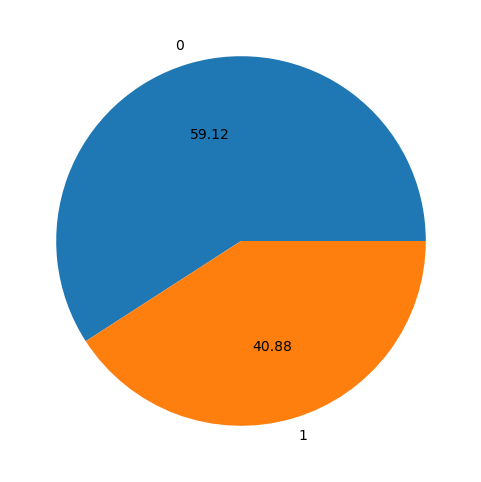

In [42]:
Marital_Status_Dist.plot(kind = 'pie', figsize = (6, 6), autopct = '%.2f')
plt.show()

So far, the customer_base is ~60% unmarried and rest married

In [43]:
Purchase_by_marital_status = data.groupby('Marital_Status')['Purchase'].sum()

In [44]:
Purchase_by_marital_status

Marital_Status
0    2966289500
1    2051378878
Name: Purchase, dtype: int64

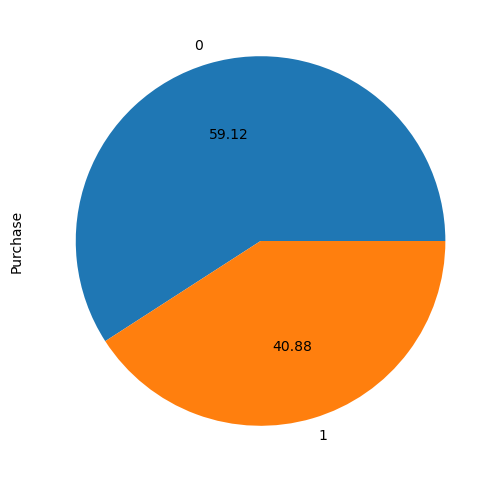

In [45]:
Purchase_by_marital_status.plot(kind = 'pie', figsize = (6,6), autopct = '%.2f')
plt.show()

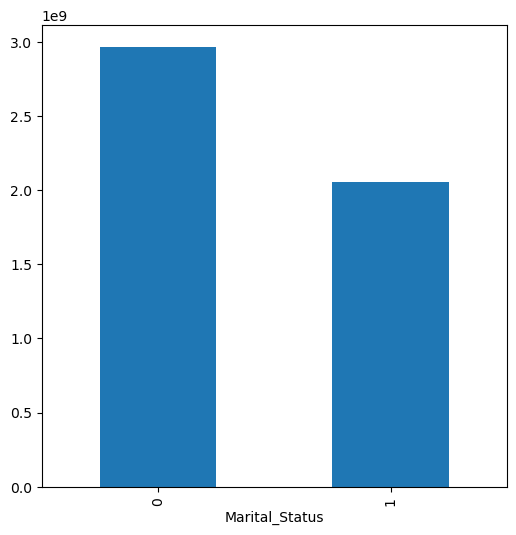

In [46]:
Purchase_by_marital_status.plot(kind = 'bar', figsize = (6,6))
plt.show()

So far, about 59% of the purchase is made by unmarried customers (which is 60% of our customers). Therefore, we would like to check the mean purchase for each category

In [47]:
mean_purchase_by_marital_status = data.groupby('Marital_Status')['Purchase'].mean()

In [48]:
mean_purchase_by_marital_status # There is barely any difference in mean purchase either

Marital_Status
0    9333.325467
1    9334.632681
Name: Purchase, dtype: float64

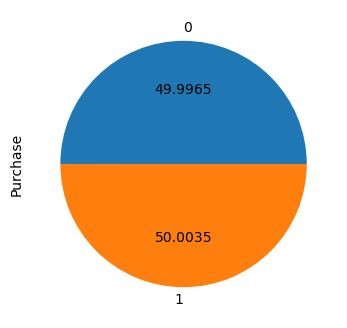

In [49]:
mean_purchase_by_marital_status.plot(kind = 'pie', figsize = (4, 4), autopct = '%.4f')
plt.show()

# Distribution of Gender across all age-Groups

Shows that Male customers are in large numbers across all age-groups

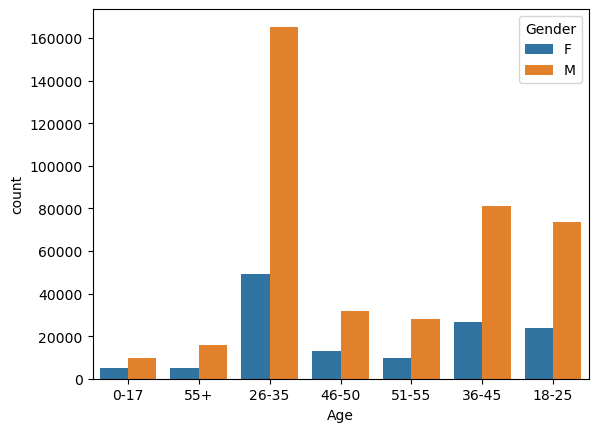

In [50]:
sns.countplot(data = data, x = 'Age', hue = 'Gender')
plt.show()

Now the other way - Distribution of Age-group across both gender

Shows that the age group 26-35 is dominant across both gender

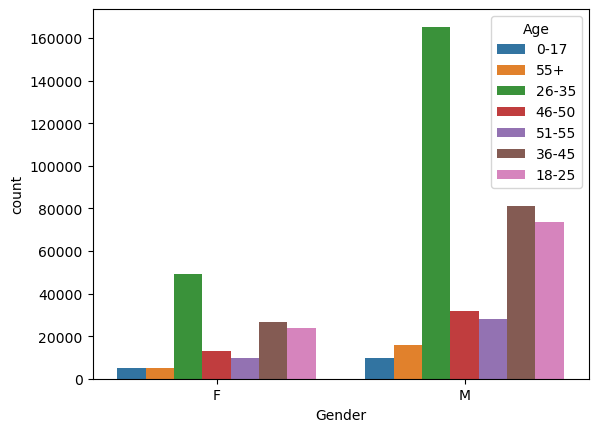

In [51]:
sns.countplot(data = data, x = 'Gender', hue = 'Age')
plt.show()

Age vs Marital Status - Shows that (18 to 45) unmarried customers are in majority, whereas other groups have married customers in majority

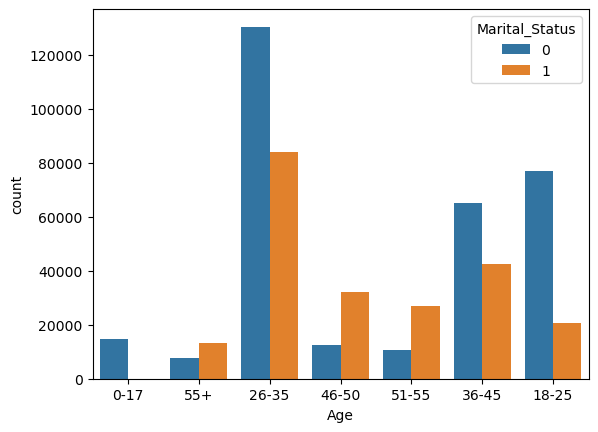

In [52]:
sns.countplot(data = data, x = 'Age', hue = 'Marital_Status')
plt.show()

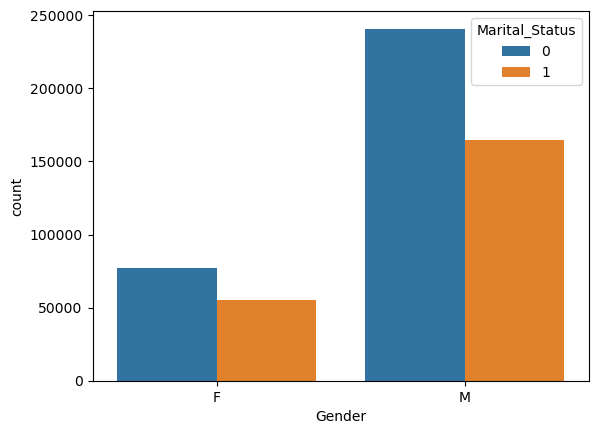

In [53]:
sns.countplot(data = data, x = 'Gender', hue = 'Marital_Status')
plt.show()

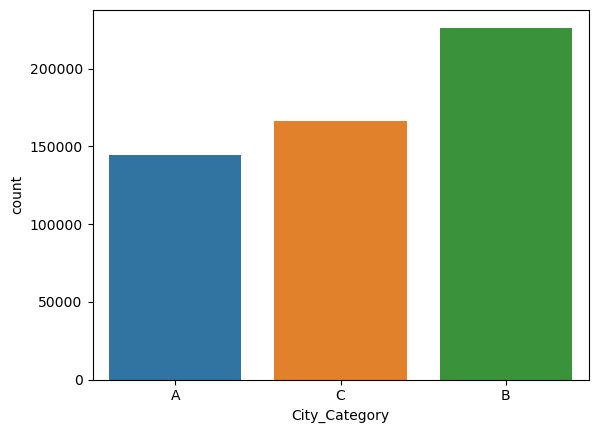

In [54]:
sns.countplot(x = data['City_Category'])
plt.show()

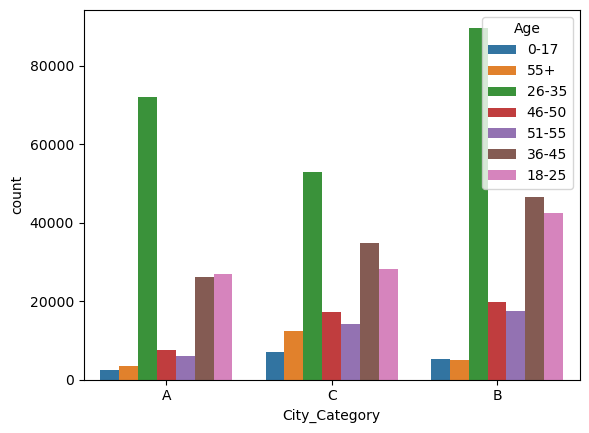

In [55]:
sns.countplot(x = 'City_Category', hue = 'Age', data = data)
plt.show()

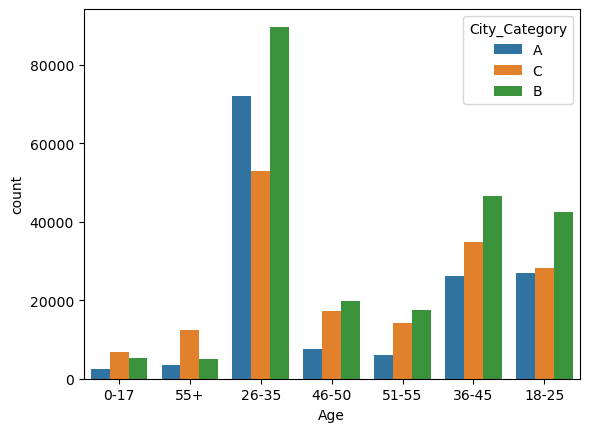

In [56]:
sns.countplot(x = 'Age', hue = 'City_Category', data = data)
plt.show()


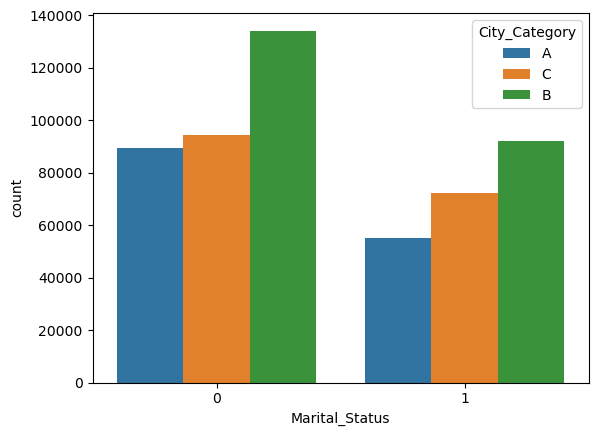

In [57]:
sns.countplot(x = 'Marital_Status', hue = 'City_Category', data = data)
plt.show()

In [58]:
num_by_city = data.groupby('City_Category').size()

In [59]:
num_by_city

City_Category
A    144638
B    226493
C    166446
dtype: int64

In [60]:
# City_Category B leads in customers by quite a bit of margin

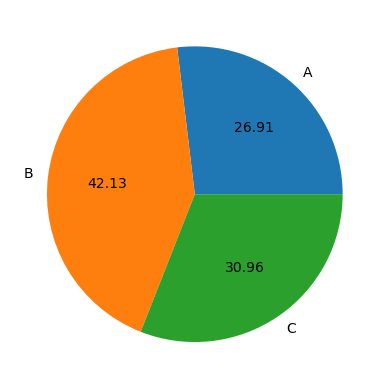

In [61]:
num_by_city.plot(kind = 'pie', autopct = '%0.2f') 
plt.show()

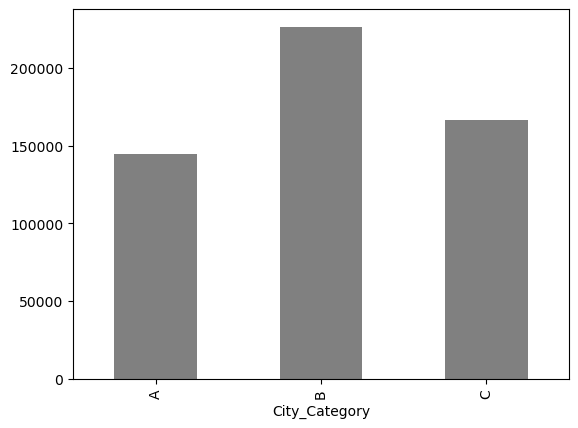

In [62]:
num_by_city.plot(kind = 'bar', color = 'gray') 
plt.show()

In [63]:
purchase_by_city_category = data.groupby('City_Category')['Purchase'].sum()

In [64]:
purchase_by_city_category

City_Category
A    1295668797
B    2083431612
C    1638567969
Name: Purchase, dtype: int64

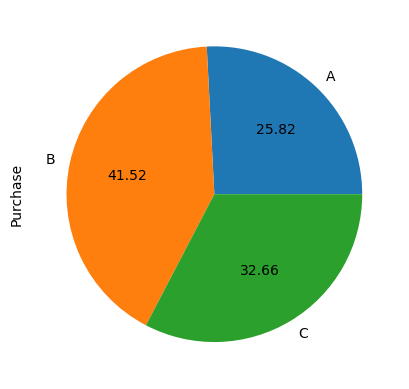

In [65]:
purchase_by_city_category.plot(kind = 'pie', autopct = '%.2f')
plt.show()

In [66]:
avg_purchase_by_city_category = data.groupby('City_Category')['Purchase'].mean()

In [67]:
avg_purchase_by_city_category # city_category C clearly leads in average purchase

City_Category
A    8958.011014
B    9198.657848
C    9844.441855
Name: Purchase, dtype: float64

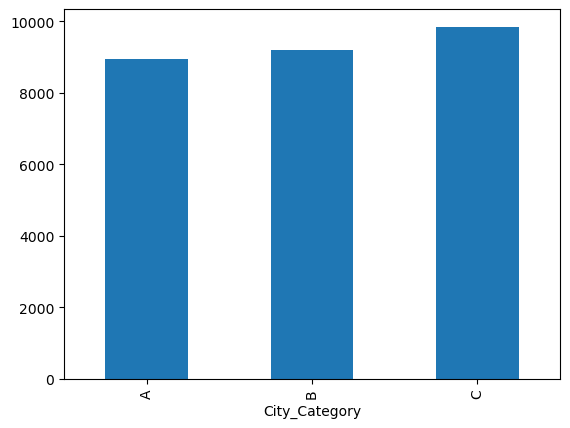

In [68]:
avg_purchase_by_city_category.plot(kind = 'bar')
plt.show()

[]

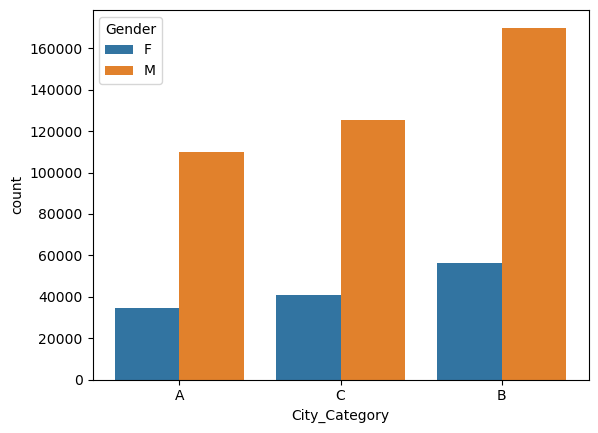

In [70]:
sns.countplot(x = 'City_Category', hue = 'Gender', data = data)
plt.plot()

In [71]:
data.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


# So far, we have not considered columns such as 'stay_in_current_city_years' and 'Occupation' 

In [72]:
data_year_stay = data.groupby('Stay_In_Current_City_Years').size()

In [73]:
data_year_stay

Stay_In_Current_City_Years
0      72725
1     189192
2      99459
3      93312
4+     82889
dtype: int64

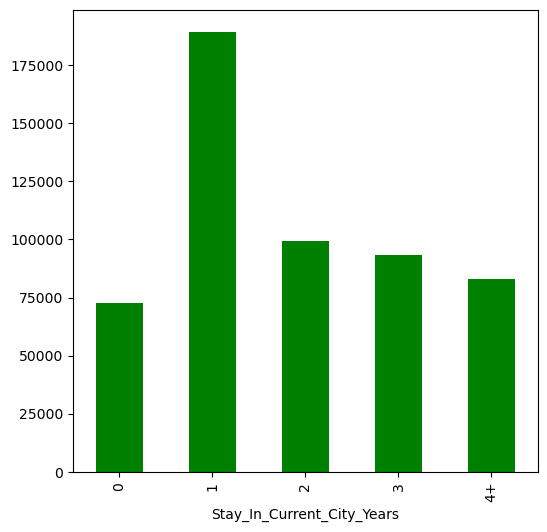

In [74]:
data_year_stay.plot(kind = 'bar', color = 'green', figsize = (6, 6))
plt.show()

<Axes: >

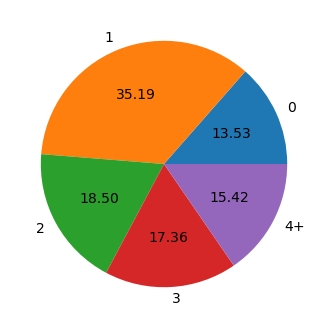

In [75]:
data_year_stay.plot(kind = 'pie', figsize = (4, 4), autopct = '%.2f')

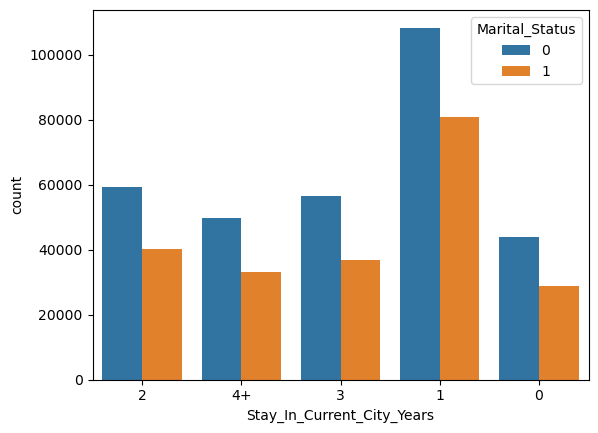

In [76]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Status', data = data)
plt.show()

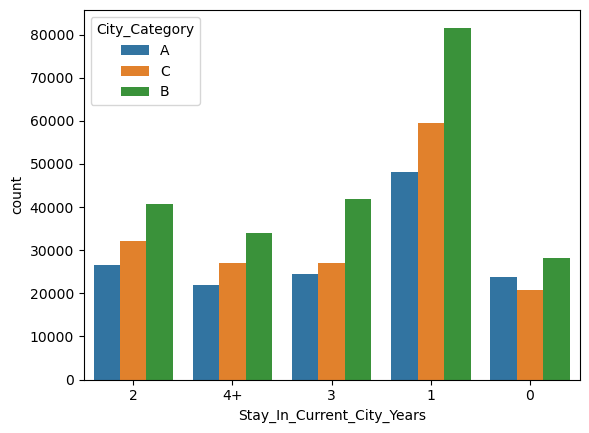

In [77]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = data)
plt.show()

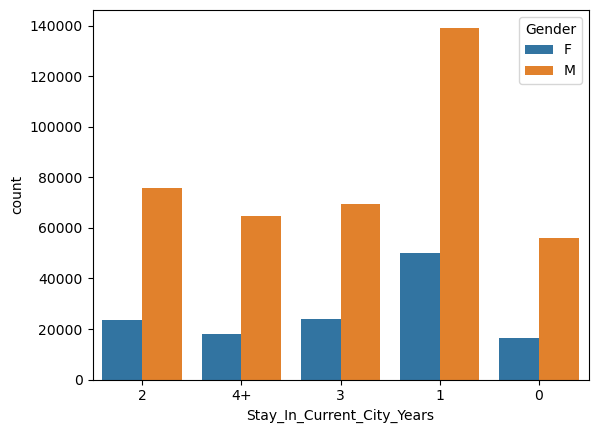

In [78]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = data)
plt.show()

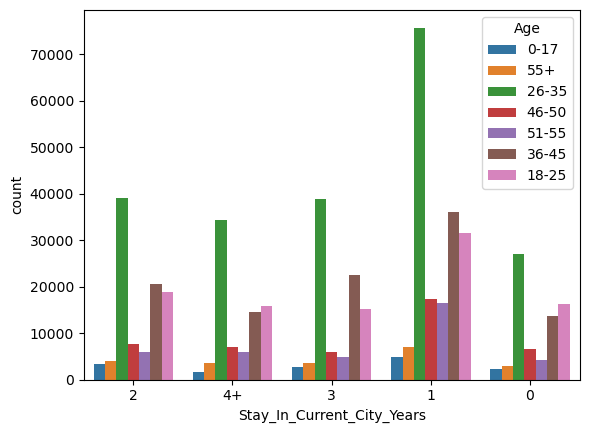

In [79]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Age', data = data)
plt.show()

In [80]:
l = []
for i in range(len(data)):
    l.append(data['Gender'][i] +"_"+ str(data['Marital_Status'][i]))

data['Marital_Gender'] = l

In [81]:
data.sample(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
175033,1003082,P00168442,F,36-45,6,B,1,0,5,1793,F_0
416645,1004083,P00221742,M,55+,14,A,0,0,1,15208,M_0
352952,1000352,P00250342,M,18-25,4,A,0,0,16,12538,M_0


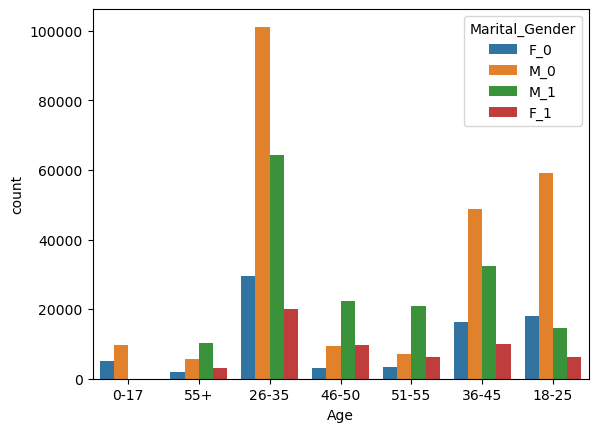

In [82]:
sns.countplot(x = 'Age', hue = 'Marital_Gender', data = data)
plt.show()

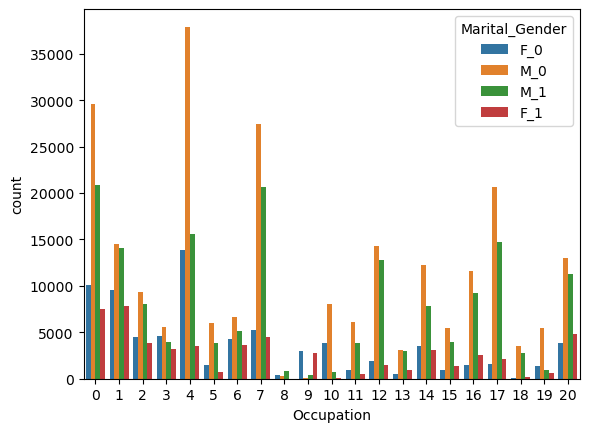

In [83]:
sns.countplot(x = 'Occupation', hue = 'Marital_Gender', data = data)
plt.show()

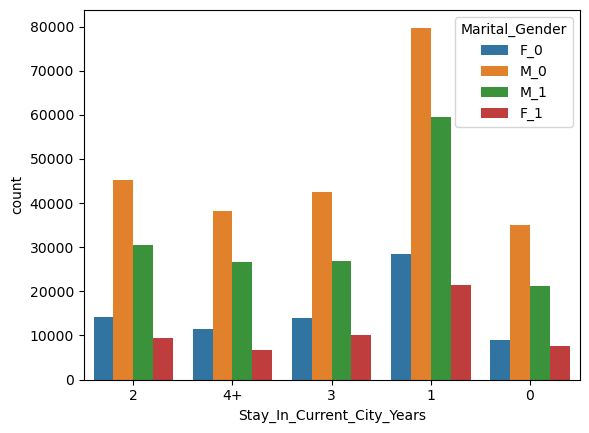

In [84]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Gender', data = data)
plt.show()

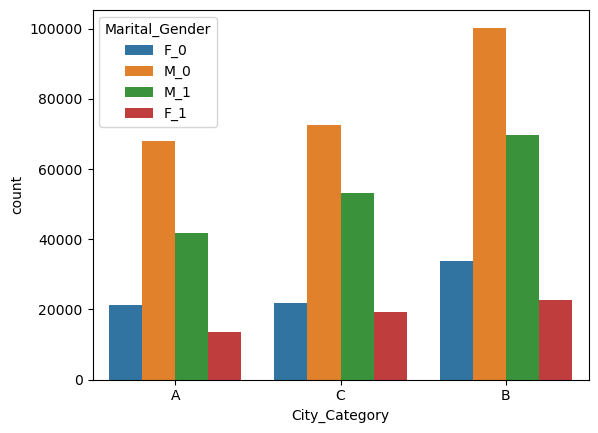

In [85]:
sns.countplot(x = 'City_Category', hue = 'Marital_Gender', data = data)
plt.show()